# **Proxenix Session 2**

In [1]:
import numpy as np

In [3]:
import pandas as pd
from matplotlib import pyplot as plt


In [6]:
data= pd.read_csv('/content/train.csv.zip')

In [9]:
data= np.array(data)
#m- total no. of images , n- total no. of columns(how many px)
#m= total no. of images , n= 784px + 1(label)=785
#this is divided into testing/dev and train

m,n=data.shape
np.random.shuffle(data)

In [11]:
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

In [13]:
data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

In [14]:
Y_train

array([1, 0, 3, ..., 1, 5, 4])

In [31]:
def init_params():
  #it will create a matrix
  W1=np.random.rand(10,784)-0.5
  b1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10,10)-0.5
  b2=np.random.rand(10,1)-0.5
  return W1,b1,W2,b2
def ReLU(Z):
  return np.maximum(Z,0)
def softmax(Z):
  A=np.exp(Z)/sum(np.exp(Z))
  return A
def forward_prop(W1,b1,W2,b2,X):
  Z1=W1.dot(X)+b1
  A1=ReLU(Z1)
  Z2=W2.dot(A1)+b2
  A2=softmax(Z2)
  return Z1,A1,Z2,A2
def ReLU_deriv(Z):
  return Z>0
def one_hot(Y):
  one_hot_Y=np.zeros((Y.size,Y.max()+1))
  #first i will crate a matrix of zeros
  one_hot_Y[np.arange(Y.size),Y]=1
  one_hot_Y=one_hot_Y.T
  return one_hot_Y
def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
  one_hot_Y=one_hot(Y)
  dZ2=A2-one_hot_Y
  dW2=1/m*dZ2.dot(A1.T)
  db2=1/m*np.sum(dZ2)
  dZ1=W2.T.dot(dZ2)*ReLU_deriv(Z1)
  dW1=1/m*dZ1.dot(X.T)
  db1=1/m*np.sum(dZ1)
  return dW1,db1,dW2,db2
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1=W1-alpha*dW1
  b1=b1-alpha*db1
  W2=W2-alpha*dW2
  b2=b2-alpha*db2
  return W1,b1,W2,b2




In [35]:
def get_predictions(A2):
  return np.argmax(A2,0)
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

In [36]:
def gradient_descent(X,Y,alpha,iterations):
  W1,b1,W2,b2=init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2=backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
    W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    if i%10==0:
      print("Iteration: ",i)
      predictions=get_predictions(A2)
      print(get_accuracy(predictions,Y))
  return W1,b1,W2,b2

In [37]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.10,500)

Iteration:  0
[6 6 6 ... 6 6 6] [1 0 3 ... 1 5 4]
0.11139024390243903
Iteration:  10
[6 0 6 ... 6 6 6] [1 0 3 ... 1 5 4]
0.20341463414634145
Iteration:  20
[6 0 6 ... 6 6 6] [1 0 3 ... 1 5 4]
0.2873170731707317
Iteration:  30
[6 0 6 ... 1 6 6] [1 0 3 ... 1 5 4]
0.35324390243902437
Iteration:  40
[6 0 6 ... 1 0 9] [1 0 3 ... 1 5 4]
0.40187804878048783
Iteration:  50
[6 0 6 ... 1 0 9] [1 0 3 ... 1 5 4]
0.44521951219512196
Iteration:  60
[6 0 6 ... 1 0 4] [1 0 3 ... 1 5 4]
0.48741463414634145
Iteration:  70
[6 0 3 ... 1 0 4] [1 0 3 ... 1 5 4]
0.5262926829268293
Iteration:  80
[6 0 3 ... 1 0 4] [1 0 3 ... 1 5 4]
0.5559512195121952
Iteration:  90
[1 0 6 ... 1 5 4] [1 0 3 ... 1 5 4]
0.5802926829268292
Iteration:  100
[1 0 6 ... 1 5 4] [1 0 3 ... 1 5 4]
0.6029024390243902
Iteration:  110
[1 0 6 ... 1 5 4] [1 0 3 ... 1 5 4]
0.6231951219512195
Iteration:  120
[1 0 5 ... 1 5 4] [1 0 3 ... 1 5 4]
0.6422682926829268
Iteration:  130
[1 0 5 ... 1 5 4] [1 0 3 ... 1 5 4]
0.6594146341463415
Iteration: 

In [39]:
def make_predictions(X,W1,b1,W2,b2):
  _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index,W1,b1,W2,b2):
  current_image = X_train[:,index,None]
  prediction = make_predictions(X_train[:, index, None],W1,b1,W2,b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [1]
Label:  1


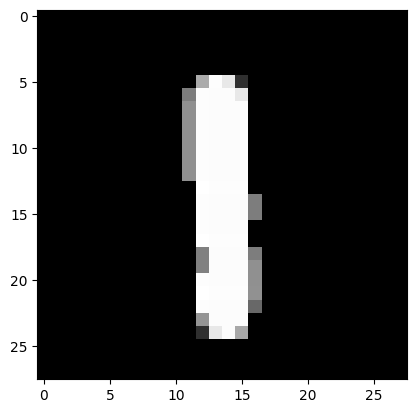

Prediction:  [6]
Label:  6


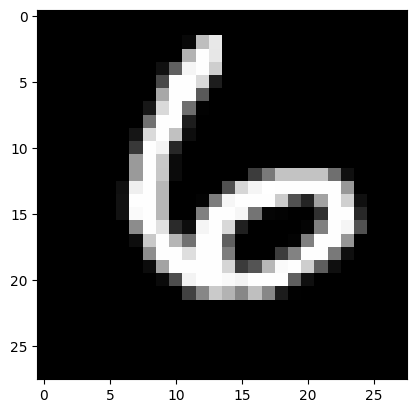

Prediction:  [8]
Label:  3


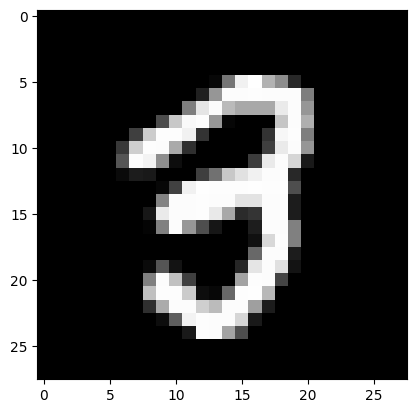

Prediction:  [3]
Label:  3


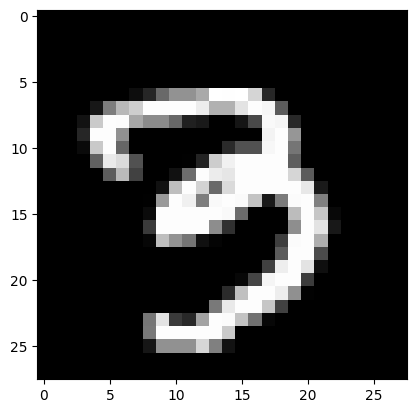

Prediction:  [5]
Label:  5


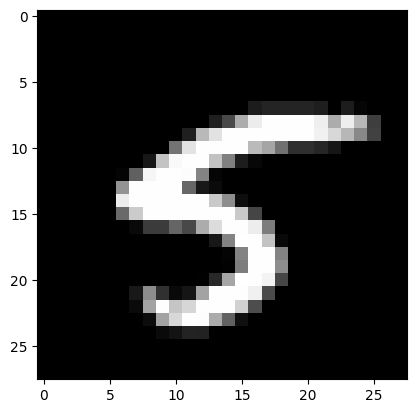

In [41]:
test_prediction(0,W1,b1,W2,b2)
test_prediction(3,W1,b1,W2,b2)
test_prediction(5,W1,b1,W2,b2)
test_prediction(6,W1,b1,W2,b2)
test_prediction(22,W1,b1,W2,b2)

Prediction:  [3]
Label:  3


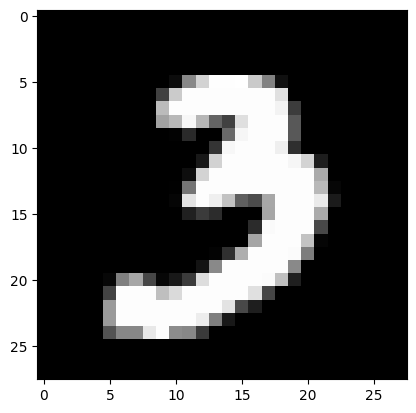

In [43]:
test_prediction(33,W1,b1,W2,b2)

Prediction:  [3]
Label:  5


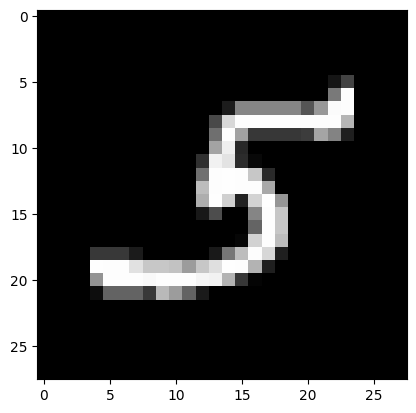

In [44]:
test_prediction(12,W1,b1,W2,b2)

Prediction:  [3]
Label:  3


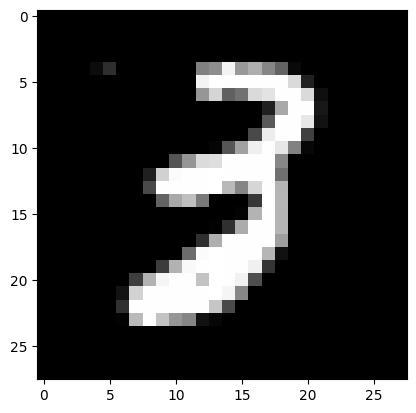

In [45]:
test_prediction(34,W1,b1,W2,b2)